# Imports

In [131]:
# sklearn.datasets
from sklearn import datasets

# regular libraries
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn.model_selection
from sklearn.model_selection import train_test_split as tts, GridSearchCV

# sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

# sklearn.svm
from sklearn.svm import SVC

# sklearn.metrics
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report

## Loading Data

In [132]:
X, y = datasets.load_wine(return_X_y=True)

## Checking if there is missing datas

In [133]:
print("NaN X values:", np.isnan(X).sum())
print("NaN y values:", np.isnan(y).sum())

NaN X values: 0
NaN y values: 0


## Countplot of target variable

c:\users\erenx\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

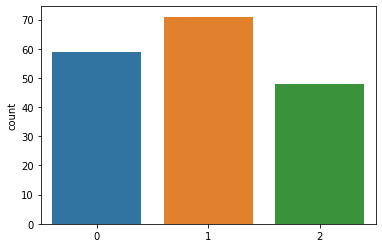

In [134]:
sns.countplot(y)

## Train Test Split

In [166]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

## Scaling with Standard Scaler

In [167]:
scaler = StandardScaler()

In [168]:
X_train_std = scaler.fit_transform(X_train)

In [169]:
X_test_std = scaler.transform(X_test)

## Support Vector Classifier with linear kernel

In [170]:
clf = SVC(C=0.001, kernel='linear', class_weight='balanced')

In [171]:
clf.fit(X_train_std, y_train)

SVC(C=0.001, class_weight='balanced', kernel='linear')

#### Accuracy Score

In [172]:
y_pred = clf.predict(X_test_std)

In [173]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy of SVC on test set: %0.3f" % acc)

Accuracy of SVC on test set: 0.704


#### Confusion Matrix

In [174]:
print("Classificaton Report:")
print(classification_report(y_test, y_pred))

Classificaton Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.24      0.38        21
           2       0.52      1.00      0.68        15

    accuracy                           0.70        54
   macro avg       0.81      0.75      0.67        54
weighted avg       0.83      0.70      0.65        54



Text(0.5, 1.0, 'Confusion Matrix')

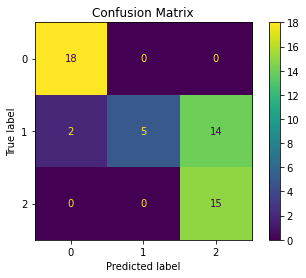

In [189]:
plot_confusion_matrix(clf, X_test_std, y_test)
plt.title("Confusion Matrix")

## Using GridSearchCV

In [190]:
svc_params = {'C':[0.01, 0.1, 1.0, 10.0],
              'gamma':[0.01, 0.1, 1.0, 10.0],
              'kernel':['linear', 'rbf']}

In [206]:
cv = GridSearchCV(estimator=clf, param_grid=svc_params, cv=5)

In [207]:
cv.fit(X_train_std, y_train)

GridSearchCV(cv=5,
             estimator=SVC(C=0.001, class_weight='balanced', kernel='linear'),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0],
                         'gamma': [0.01, 0.1, 1.0, 10.0],
                         'kernel': ['linear', 'rbf']})

In [208]:
svc_best_params = cv.best_params_

#### Accuracy Score

In [209]:
y_pred_cv = cv.predict(X_test_std)

In [210]:
acc_cv = accuracy_score(y_test, y_pred_cv)
print("Accuracy of SVC on test set: %0.3f" % acc_cv)

Accuracy of SVC on test set: 0.981


#### GridSearch Confusion Matrix

In [211]:
print("Classificaton Report of GridSearch:")
print(classification_report(y_test, y_pred_cv))

Classificaton Report of GridSearch:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



Text(0.5, 1.0, 'Confusion Matrix')

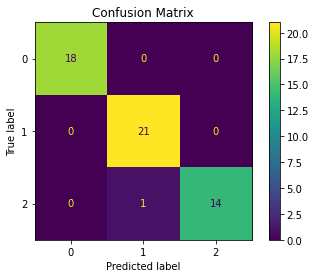

In [212]:
plot_confusion_matrix(cv, X_test_std, y_test)
plt.title("Confusion Matrix")